In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
import random
from tqdm import tqdm
from ToyMDP import ToyMDP as mdp
from ToyMDP import get_state_id, get_action_id, policy
from algo import q_leanring

# source
source_reward_weight = [1, 1]
source = mdp(source_reward_weight, uncertain_prob='source')

# target
target_reward_weight = [1, -1]
target = mdp(target_reward_weight, uncertain_prob='source')


In [2]:
Q_source = q_leanring(env=source, num_epochs=500)
Q_target = q_leanring(env=target, num_epochs=500)

100%|██████████| 100/100 [00:00<00:00, 7421.45it/s]


state:0, action:-1, next_state:-1, reward:0.8
state:-1, action:-1, next_state:-2, reward:0.6


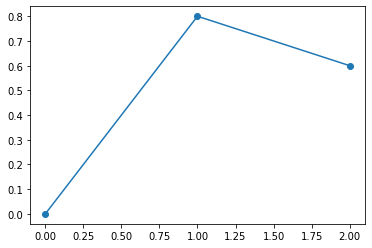

In [16]:
state = target.reset()
done = False
ep_reward = [0]

while not done: 
    action = policy(state, Q_target, epsilon=0.0)
    next_state, reward = target.step(state, action)

    # save reward 
    ep_reward.append(reward)

    if next_state == target.trap or next_state == target.goal:
        done = True

    print(f'state:{state}, action:{action}, next_state:{next_state}, reward:{reward}')
    state = next_state

plt.plot(ep_reward, '-o')

In [17]:
Q_target

array([[0.6   , 0.1875],
       [0.8   , 0.2   ],
       [0.5   , 0.    ]])

In [34]:
policy(0, Q_source, epsilon=0.0)

-1

In [49]:
def decision(state, Q, epsilon=0.05):
    """
    epsilon-greedy policy
    """

    if np.random.randn() < epsilon: 
        # random action
        action = random.choice([1, -1])
    else:
        # greedy action
        action = np.argmax(Q[state, :])
        if action == 0: 
            action = -1  # need to adjust action for index
        else:
            action = +1

    return action

decision(0, Q_source, epsilon=0)

yes


-1